In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import date
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from matplotlib import colors

### Create regression data

In [17]:
tfidf_path = '../../data/tfidf_merged_chs_202001/'

In [18]:
lda_path = '../../data/lda_merged_chs_202001/'

In [19]:
# fandom_list = [
#  'star_wars_all_media_types',
#  'arthurian_mythology_&_related_fandoms',
#  'haikyuu',
#  'kuroko_no_basuke',
#  'hamilton_miranda',
#  'the_walking_dead_&_related_fandoms',
#  'buffy_the_vampire_slayer',
#  'les_miserables_all_media_types',
#  'naruto',
#  'shakespare_william_works',
#  'bishoujo_senshi_sailor_moon',
#  'sherlock_holmes_&_related_fandoms']

In [20]:
fandom_list = ['harry_potter',
 'dcu',
 'doctor_who_&_related_fandoms',
 'star_wars_all_media_types',
 'arthurian_mythology_&_related_fandoms',
 'supernatural',
 'haikyuu',
 'kuroko_no_basuke',
 'hamilton_miranda',
 'dragon_age_all_media_types',
 'the_walking_dead_&_related_fandoms',
 'buffy_the_vampire_slayer',
 'les_miserables_all_media_types',
 'naruto',
 'tolkien_j_r_r_works_&_related_fandoms',
 'shakespare_william_works',
 'hetalia_axis_powers',
 'attack_on_titan',
 'ms_paint_adventures',
 'marvel',
 'bishoujo_senshi_sailor_moon',
 'one_direction',
 'sherlock_holmes_&_related_fandoms']

In [21]:
def first_rel(field):
    try:
        return field.split(',')[0]
    except:
        return field

In [22]:
def find_major_rel(df):
    df['Relationship'] = df.apply(lambda row: first_rel(row['Relationship']), axis=1)
    counts = df['Relationship'].value_counts()
    return counts.keys()[0:5]


In [25]:
df_all = []
for i,fandom in enumerate(fandom_list):
    df_tfidf = pd.read_csv(os.path.join(tfidf_path,fandom + '_temporal_tfidf_cos_merged_chapters_sampled.tsv'), sep = '\t')
    del df_tfidf['index']
    df_lda = pd.read_csv(os.path.join(lda_path,fandom + '_temporal_lda_jsd_toprev_with_dist_merged_chs_sampled.tsv'), sep = '\t',  quotechar=None, quoting=3)
    del df_lda['index']
    del df_lda['Text']
    del df_lda['Dist']
    del df_lda['Chapters']
#     print(len(df_tfidf[df_tfidf.Kudos == 0]), len(df_lda[df_lda.Kudos == 0]))
    print(sorted(df_tfidf.Kudos.tolist())[0:10])
    print(sorted(df_lda.Kudos.tolist())[0:10])

    #     print(df_tfidf.head())
#     print()
#     print(df_lda.head())
#     print(df_tfidf.dtypes)
#     print()
#     print(df_lda.dtypes)
#     print('-----')
#     print()
    #     for col in df_lda.columns.values:
#         print(df_lda[col].tolist()[0:100])
    df_lda['UpdateDate'] = df_lda['UpdateDate'].astype('object')
    df = pd.merge(df_tfidf, df_lda, on=['AdditionalTags', 'ArchiveWarnings', 'Author', 'Bookmarks', 'Category',\
  'Characters','Comments' ,'CompleteDate',\
 'Fandoms', 'Hits' ,'Kudos', 'Language' ,'PublishDate' ,'Rating',\
 'Relationship','Title'  ,'UpdateDate' ,'Words'], how='inner')

    df['fandom_category'] = fandom    

    df = df.replace([np.inf, -np.inf], np.nan)
    df['Hits'].fillna(0, inplace=True)
    df['Kudos'].fillna(0, inplace=True)
    df['Bookmarks'].fillna(0, inplace=True)
    df['Comments'].fillna(0, inplace=True)

    freq_rel = find_major_rel(df)
    df['Relationship'] = df['Relationship'].apply(lambda x: first_rel(x))
    df['Freq_relationship'] = df['Relationship'].apply(lambda x: 1 if x in freq_rel else 0)
    del df['Relationship']
    df_all.append(df)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 4.0, 4.0, 4.0, 5.0]
[1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 4.0, 7.0, 7.0, 8.0, 9.0, 9.0, 11.0, 11.0, 12.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [26]:
df_all = pd.concat(df_all)

In [27]:
len(df_all)

101002

In [28]:
len(df_all.drop_duplicates())

101002

In [29]:
df_all.head()

,AdditionalTags,ArchiveWarnings,Author,Bookmarks,Category,Chapters,Characters,Fandoms,Hits,Kudos,...,UpdateDate,CompleteDate,Comments,URL_x,Cos,Entropy,URL_y,JSD,fandom_category,Freq_relationship
0,"Afterlife, Humor, Friendship, Friendship/Love",No Archive Warnings Apply,crossingwinter,21,F/MGen,24,"Ariana Dumbledore, Gideon Prewett, Fabian Prew...",['Harry Potter - J. K. Rowling'],2399.0,53.0,...,NaN,2009-07-16,16,http://archiveofourown.org/works/488677/chapte...,0.444622,5.318853,http://archiveofourown.org/works/488677/chapte...,0.185995,harry_potter,0
1,"Alternate Universe, Suicide","Major Character Death, Rape/Non-Con",Batsutousai,7,F/MM/M,1,"Harry Potter, Voldemort, Ron Weasley",['Harry Potter - J. K. Rowling'],2333.0,80.0,...,NaN,2009-07-11,3,http://archiveofourown.org/works/208853?view_a...,0.399930,5.704787,http://archiveofourown.org/works/208853?view_a...,0.235195,harry_potter,0
2,"Alzheimer\'s Disease, Angst",No Archive Warnings Apply,thesewarmstars,1,GenM/M,1,"Albus Dumbledore, Severus Snape",['Harry Potter - J. K. Rowling'],200.0,21.0,...,NaN,2009-07-09,0,http://archiveofourown.org/works/1644146,0.486395,4.711733,http://archiveofourown.org/works/1644146,0.518356,harry_potter,0
3,"Amnesia, Temporary Amnesia, Spells & Enchantme...",No Archive Warnings Apply,EntreNous,14,M/M,2,"Ron Weasley, Draco Malfoy, Harry Potter, Hermi...",['Harry Potter - Fandom'],1635.0,115.0,...,NaN,2009-07-07,4,http://archiveofourown.org/works/967862/chapte...,0.399916,5.775471,http://archiveofourown.org/works/967862/chapte...,0.202233,harry_potter,0
4,"Anal Sex, Bottom Snape, Crack, Virgin Snape",No Archive Warnings Apply,thesewarmstars,5,M/M,1,"Harry Potter, Severus Snape",['Harry Potter - J. K. Rowling'],2560.0,103.0,...,NaN,2009-07-20,3,http://archiveofourown.org/works/1649069?view_...,0.386655,5.130537,http://archiveofourown.org/works/1649069?view_...,0.500391,harry_potter,1


In [30]:
len(set(df_all.Author.tolist()))

39277

In [31]:
len(df_all[df_all.Bookmarks == 0])

18534

In [32]:
sorted(df_all.Kudos.tolist())[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [33]:
del df_all['Language']
del df_all['Title']
del df_all['AdditionalTags']
del df_all['Fandoms']
del df_all['Characters']

In [34]:
len(df_all)

101002

In [35]:
df_all['Category'].fillna('Unknown', inplace=True)
df_all['Category_F_F'] = df_all['Category'].apply(lambda x: 1 if 'F/F' in x else 0)
df_all['Category_F_M'] = df_all['Category'].apply(lambda x: 1 if 'F/M' in x else 0)
df_all['Category_Gen'] = df_all['Category'].apply(lambda x: 1 if 'Gen' in x else 0)
df_all['Category_M_M'] = df_all['Category'].apply(lambda x: 1 if 'M/M' in x else 0)
df_all['Category_Multi'] = df_all['Category'].apply(lambda x: 1 if 'Multi' in x else 0)
df_all['Category_Other'] = df_all['Category'].apply(lambda x: 1 if 'Other' in x else 0)
df_all['Category_Unknown'] = df_all['Category'].apply(lambda x: 1 if 'Unknown' in x else 0)
del df_all['Category']

In [36]:
df_all['ArchiveWarnings_underage'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Underage' in x else 0)
df_all['ArchiveWarnings_death'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Major Character Death' in x else 0)
df_all['ArchiveWarnings_choose_no'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Creator Chose Not To Use Archive Warnings' in x else 0)
df_all['ArchiveWarnings_no_apply'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'No Archive Warnings Apply' in x else 0)
df_all['ArchiveWarnings_violence'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Graphic Depictions Of Violence' in x else 0)
df_all['ArchiveWarnings_noncon'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Rape/Non-Con' in x else 0)

del df_all['ArchiveWarnings']

In [37]:
# df_all = df_all[df_all['ArchiveWarnings_blood'] != 1]
# df_all = df_all[df_all['ArchiveWarnings_none'] != 1]

In [38]:
df_all['Author'].fillna('Unknown', inplace=True)
counts = df_all['Author'].value_counts()
idx = counts[counts >= 10].index
df_all['author_fic_cnt'] = df_all['Author'].apply(lambda x: counts[x])
del df_all['Author']

In [39]:
df_all['Rating_E'] = df_all['Rating'].apply(lambda x: 1 if x == 'Explicit' else 0)
df_all['Rating_G'] = df_all['Rating'].apply(lambda x: 1 if x == 'General Audiences' else 0)
df_all['Rating_M'] = df_all['Rating'].apply(lambda x: 1 if x == 'Mature' else 0)
df_all['Rating_N'] = df_all['Rating'].apply(lambda x: 1 if x == 'Not Rated' else 0)
df_all['Rating_T'] = df_all['Rating'].apply(lambda x: 1 if x == 'Teen And Up Audiences' else 0)
del df_all['Rating']

In [40]:
df_all['Fandom_harry_potter'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'harry_potter' else 0)
df_all['Fandom_dcu'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'dcu' else 0)
df_all['Fandom_doctor_who'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'doctor_who_&_related_fandoms' else 0)
df_all['Fandom_star_wars'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'star_wars_all_media_types' else 0)
df_all['Fandom_arthurian'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'arthurian_mythology_&_related_fandoms' else 0)
df_all['Fandom_supernatural'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'supernatural' else 0)
df_all['Fandom_haikyuu'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'haikyuu' else 0)
df_all['Fandom_kuroko_no_basuke'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'kuroko_no_basuke' else 0)
df_all['Fandom_hamilton_miranda'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'hamilton_miranda' else 0)
df_all['Fandom_dragon_age'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'dragon_age_all_media_types' else 0)
df_all['Fandom_the_walking_dead'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'the_walking_dead_&_related_fandoms' else 0)
df_all['Fandom_buffy'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'buffy_the_vampire_slayer' else 0)
df_all['Fandom_les_miserables'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'les_miserables_all_media_types' else 0)
df_all['Fandom_naruto'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'naruto' else 0)
df_all['Fandom_tolkien'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'tolkien_j_r_r_works_&_related_fandoms' else 0)
df_all['Fandom_shakespare'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'shakespare_william_works' else 0)
df_all['Fandom_hetalia'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'hetalia_axis_powers' else 0)
df_all['Fandom_attack_on_titan'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'attack_on_titan' else 0)
df_all['Fandom_ms_paint_adventures'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'ms_paint_adventures' else 0)
df_all['Fandom_marvel'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'marvel' else 0)
df_all['Fandom_sailor_moon'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'bishoujo_senshi_sailor_moon' else 0)
df_all['Fandom_one_direction'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'one_direction' else 0)
df_all['Fandom_sherlock'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'sherlock_holmes_&_related_fandoms' else 0)

del df_all['fandom_category']

In [41]:
def date_today(cell):
    try:
        y, m, d = cell.split('-')
        return abs(date.today() - date(int(y), int(m), int(d))).days
    except:
        return float('nan')

In [42]:
df_all['PublishDate'] = df_all.apply(lambda row: date_today(row['PublishDate']), axis = 1)
df_all['CompleteDate'] = df_all.apply(lambda row: date_today(row['CompleteDate']), axis = 1)
df_all['UpdateDate'] = df_all.apply(lambda row: date_today(row['UpdateDate']), axis = 1)

In [43]:
def find_history(field_list):
    field_list = [10000000 if np.isnan(x) else x for x in field_list]
    return np.amin(field_list)

In [44]:
df_all['history'] = df_all.apply(lambda row: find_history([row['PublishDate'], row['CompleteDate'], row['UpdateDate']]), axis=1)

In [45]:
del df_all['PublishDate']
del df_all['CompleteDate']
del df_all['UpdateDate']

In [46]:
len(df_all)

101002

In [47]:
# df_t = df_all.sample(100)
# for col in df_t.columns.values:
#     print(col)
#     print(df_t[col].tolist())
#     print()

In [48]:
# df1 = df_all[df_all.isnull().any(axis=1)]

In [49]:
df_all.columns.values

array(['Bookmarks', 'Chapters', 'Hits', 'Kudos', 'Words', 'Comments',
       'URL_x', 'Cos', 'Entropy', 'URL_y', 'JSD', 'Freq_relationship',
       'Category_F_F', 'Category_F_M', 'Category_Gen', 'Category_M_M',
       'Category_Multi', 'Category_Other', 'Category_Unknown',
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',
       'ArchiveWarnings_violence', 'ArchiveWarnings_noncon',
       'author_fic_cnt', 'Rating_E', 'Rating_G', 'Rating_M', 'Rating_N',
       'Rating_T', 'Fandom_harry_potter', 'Fandom_dcu',
       'Fandom_doctor_who', 'Fandom_star_wars', 'Fandom_arthurian',
       'Fandom_supernatural', 'Fandom_haikyuu', 'Fandom_kuroko_no_basuke',
       'Fandom_hamilton_miranda', 'Fandom_dragon_age',
       'Fandom_the_walking_dead', 'Fandom_buffy', 'Fandom_les_miserables',
       'Fandom_naruto', 'Fandom_tolkien', 'Fandom_shakespare',
       'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_

In [50]:
df_all = df_all.rename(columns = {'history':'History', 'Cos': 'Term_novelty', 'JSD': 'Topic_novelty'})

In [51]:
df_all.columns.values

array(['Bookmarks', 'Chapters', 'Hits', 'Kudos', 'Words', 'Comments',
       'URL_x', 'Term_novelty', 'Entropy', 'URL_y', 'Topic_novelty',
       'Freq_relationship', 'Category_F_F', 'Category_F_M',
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other',
       'Category_Unknown', 'ArchiveWarnings_underage',
       'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
       'ArchiveWarnings_no_apply', 'ArchiveWarnings_violence',
       'ArchiveWarnings_noncon', 'author_fic_cnt', 'Rating_E', 'Rating_G',
       'Rating_M', 'Rating_N', 'Rating_T', 'Fandom_harry_potter',
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
     

In [52]:
df_all.head()

,Bookmarks,Chapters,Hits,Kudos,Words,Comments,URL_x,Term_novelty,Entropy,URL_y,...,Fandom_tolkien,Fandom_shakespare,Fandom_hetalia,Fandom_attack_on_titan,Fandom_ms_paint_adventures,Fandom_marvel,Fandom_sailor_moon,Fandom_one_direction,Fandom_sherlock,History
0,21,24,2399.0,53.0,66258.0,16,http://archiveofourown.org/works/488677/chapte...,0.444622,5.318853,http://archiveofourown.org/works/488677/chapte...,...,0,0,0,0,0,0,0,0,0,3842.0
1,7,1,2333.0,80.0,3542.0,3,http://archiveofourown.org/works/208853?view_a...,0.399930,5.704787,http://archiveofourown.org/works/208853?view_a...,...,0,0,0,0,0,0,0,0,0,3847.0
2,1,1,200.0,21.0,837.0,0,http://archiveofourown.org/works/1644146,0.486395,4.711733,http://archiveofourown.org/works/1644146,...,0,0,0,0,0,0,0,0,0,3849.0
3,14,2,1635.0,115.0,15774.0,4,http://archiveofourown.org/works/967862/chapte...,0.399916,5.775471,http://archiveofourown.org/works/967862/chapte...,...,0,0,0,0,0,0,0,0,0,3851.0
4,5,1,2560.0,103.0,781.0,3,http://archiveofourown.org/works/1649069?view_...,0.386655,5.130537,http://archiveofourown.org/works/1649069?view_...,...,0,0,0,0,0,0,0,0,0,3838.0


In [53]:
df_all.to_csv('../../data/fanfic_regression_data_merged_chs.tsv', sep = '\t', index=False)

### Correlations

In [62]:
df_all = pd.read_csv('../../data/fanfic_regression_data_merged_chs.tsv', sep = '\t')

In [63]:
df_all = df_all.rename(columns = {'author_fic_cnt':'Author work count',\
                                  'Term_novelty': 'Term novelty', 'Topic_novelty':'Topic novelty'})

In [64]:
term_ave = np.average(df_all['Term novelty'])
topic_ave = np.average(df_all['Topic novelty'])
df_all['Term novelty cent'] = df_all['Term novelty'] - term_ave
df_all['Topic novelty cent'] = df_all['Topic novelty'] - topic_ave
df_all['Term novelty squared'] = np.square(df_all['Term novelty cent'])
df_all['Topic novelty squared'] = np.square(df_all['Topic novelty cent'])

In [65]:
df_all.columns.values

array(['Bookmarks', 'Chapters', 'Hits', 'Kudos', 'Words', 'Comments',
       'URL_x', 'Term novelty', 'Entropy', 'URL_y', 'Topic novelty',
       'Freq_relationship', 'Category_F_F', 'Category_F_M',
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other',
       'Category_Unknown', 'ArchiveWarnings_underage',
       'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
       'ArchiveWarnings_no_apply', 'ArchiveWarnings_violence',
       'ArchiveWarnings_noncon', 'Author work count', 'Rating_E',
       'Rating_G', 'Rating_M', 'Rating_N', 'Rating_T',
       'Fandom_harry_potter', 'Fandom_dcu', 'Fandom_doctor_who',
       'Fandom_star_wars', 'Fandom_arthurian', 'Fandom_supernatural',
       'Fandom_haikyuu', 'Fandom_kuroko_no_basuke',
       'Fandom_hamilton_miranda', 'Fandom_dragon_age',
       'Fandom_the_walking_dead', 'Fandom_buffy', 'Fandom_les_miserables',
       'Fandom_naruto', 'Fandom_tolkien', 'Fandom_shakespare',
       'Fandom_hetalia', 'Fandom_attack_on_tit

In [68]:
corr = df_all[['Kudos','Bookmarks', 'Comments', 'Hits','Chapters', 'Words', 'Author work count',\
               'Term novelty', 'Topic novelty', 'Term novelty squared', 'Topic novelty squared','History']].corr()

In [69]:
# corr = df_all[['Chapters',
#        'Term novelty', 'Topic novelty', 'Freq_relationship',
#        'Category_F_M', 'Category_Gen', 'Category_M_M', 'Category_Multi',
#        'Category_Other', 'Category_Unknown', 'ArchiveWarnings_underage',
#        'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
#        'ArchiveWarnings_no_apply', 'ArchiveWarnings_violence',
#        'ArchiveWarnings_noncon', 'Author fiction count', 'Rating_E', 'Rating_G',
#        'Rating_M', 'Rating_N', 'Rating_T', 'Fandom_harry_potter',
#        'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
#        'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
#        'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
#        'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
#        'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
#        'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
#        'Fandom_ms_paint_adventures', 'Fandom_marvel',
#        'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
#        'Age', 'Words']].corr()

In [70]:
w,v = np.linalg.eig(corr)  

In [71]:
for idx, item in enumerate(corr.columns.values):
    print(item, np.sqrt(max(w)/w[idx]))


Kudos 1.0
Bookmarks 1.3885021896913412
Comments 1.5043627547270308
Hits 5.496882730456438
Chapters 1.7587959989665447
Words 1.874653196983482
Author work count 1.82548130135074
Term novelty 2.1604548031418327
Topic novelty 2.313613358415255
Term novelty squared 3.3451998667281586
Topic novelty squared 2.9005901697327743
History 2.7359893472900674


In [72]:
# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('text', usetex=True)

/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


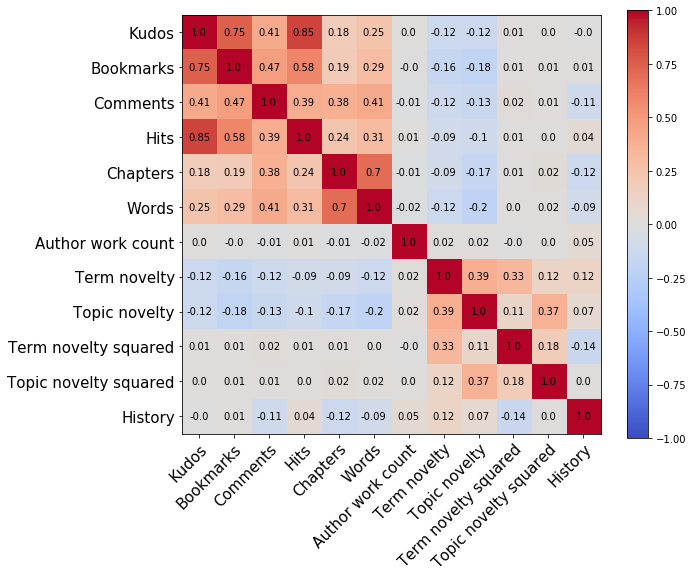

In [77]:
labels = corr.columns.values
fig, ax = plt.subplots(figsize = (10,10))

# kmin = np.amin(corr.as_matrix())
# kmax = np.amax(corr.as_matrix())

norm = colors.Normalize(vmin = -1, vmax = 1)
im = ax.imshow(corr, norm=norm,cmap='coolwarm')

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor", fontsize='15')

plt.setp(ax.get_yticklabels(), fontsize='15')

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, round(corr.as_matrix()[i, j], 2),
                       ha="center", va="center", color="black")

ax.set_title("")
fig.colorbar(im, shrink=0.7)
fig.tight_layout()
plt.savefig('variables_corr.pdf', format='pdf')